# NLP
### L'APPLICATION D'APPRENTISSAGE SUPERVISÉ SUR UN FICHIER DE DONNÉS CONTENTANT LES FEEDBACK OF RESTAURANT


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df2= pd.read_table("Dataset2.tsv")
df2 = df2. drop(labels='Liked', axis=1)
print(df2.shape)
print(df2.columns)
df2.dtypes

(1000, 1)
Index(['Review'], dtype='object')


Review    object
dtype: object

In [125]:
!head Dataset2.tsv
#afficher les premiers lignes de dataset,il s'agit d'un apprentissage supervise par la var cible sentiment

Review	Liked
Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1


In [126]:
df2

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


In [127]:
# chargement des modules necessaire pour le nettoyage des donnés(comme pandas ou re-regExpression,nltk(natural lang tool kit))
import re 
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/acer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
from nltk.corpus import stopwords

In [129]:
stopwords.words("english")
#this will give us all the list of stopwords(words that doesnt contain information) in english bc the feedbacks is in english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [130]:

df2.iloc[3,0]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [131]:
phrase_brute =df2.iloc[3,0]

In [132]:
#etape1(on va utiliser le module re et la fonction sub pour effectuer un changment sur la phrase)
phrase_brute =re.sub("[^a-zA-Z]"," ",phrase_brute) #ON remplace tous les caracters sauf a-zA-Z PAR un espace sur la phrase brute

In [133]:
#etape2 from maj to min
phrase_brute =phrase_brute.lower()

In [134]:
phrase_brute

'stopped by during the late may bank holiday off rick steve recommendation and loved it '

In [135]:
#etape3 decomposer les phrases en grouops des mots
phrase_brute=phrase_brute.split()

In [136]:
for x in phrase_brute:
    print(x)

stopped
by
during
the
late
may
bank
holiday
off
rick
steve
recommendation
and
loved
it


In [137]:
#etape4 supprimer les stopwords(garde just les mots qui ne figurent pas dans les stopwords)
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
phrase_propre=[]
for x in phrase_brute:
    if (x not in set(stopwords.words("english"))):
        phrase_propre.append(ps.stem(x))#stem pour rendre le mot a sa racine
print(phrase_propre)
        


['stop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'love']


In [138]:
ps.stem("")

''

In [139]:
#etap6 fabriquation de corpus(list to chaine caracter)
phrase_propre=" ".join(phrase_propre)

In [140]:
phrase_propre

'stop late may bank holiday rick steve recommend love'

In [141]:
#l'application de ces etapes sur tous les lignes
corpus=[]
for i in range(1000):
    review= re.sub("[^a-zA-Z]"," ",df2.iloc[i,0])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(x) for x in review if not x in set(stopwords.words("english"))]
    review= " ".join(review)
    corpus.append(review)

In [142]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [145]:
#Encodage des donnes textuelles presentes dans le corpus(transforme data en vecteurs numeriques)
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [146]:
x=cv.fit_transform(corpus).toarray()
y=df2.iloc[:,-1]


In [119]:
xdf=pd.DataFrame(data=x,columns=cv.get_feature_names())
ydf=pd.DataFrame(data=y.values,columns=['Target'])
df2= pd .concat([xdf,ydf],axis=1)
df2

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,991
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,992
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,993
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,994


In [147]:
cv.get_feature_names()
y=df2.iloc[:,-1]

In [148]:
from textblob import TextBlob
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment>0:
        result="positive"
    elif sentiment  <= 0:
        result="negative"

    return result

In [149]:
df2['Sentiment']=df2['Review'].apply(get_sentiment)

In [150]:
df2

,Review,Sentiment
0,Wow... Loved this place.,positive
1,Crust is not good.,negative
2,Not tasty and the texture was just nasty.,negative
3,Stopped by during the late May bank holiday of...,positive
4,The selection on the menu was great and so wer...,positive
...,...,...
995,I think food should have flavor and texture an...,negative
996,Appetite instantly gone.,negative
997,Overall I was not impressed and would not go b...,negative
998,"The whole experience was underwhelming, and I ...",positive


In [151]:
df2['Sentiment'].value_counts()

positive    514
negative    486
Name: Sentiment, dtype: int64

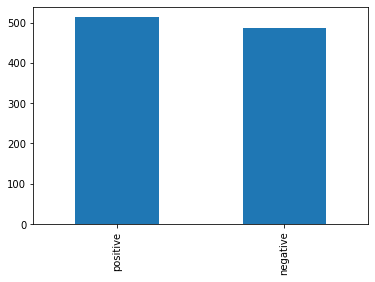

In [152]:
df2['Sentiment'].value_counts().plot(kind='bar')

In [155]:
#extract top 50 keyword in each sentiment
from collections import Counter
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)
positive_list= df2[df2['Sentiment']=='positive']['Review'].tolist()
positive_docx=' '.join(positive_list)
positive_docx


'Wow... Loved this place. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. Honeslty it didn\'t taste THAT fresh.) The fries were great too. A great touch. Service was very prompt. Highly recommended. The food, amazing. Service is also cute. I could care less... The interior is just beautiful. That\'s right....the red velvet cake.....ohhh this stuff is so good. This hole in the wall has great Mexican street tacos, and friendly staff. Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed. Also there are combos like a burger, fries, and beer for 23 which is a decent deal. seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere. The only redeeming quality of the restaurant was that it was very inexpensive. Ample portions and good prices. My first vi

In [157]:
keyword_positive=extract_keywords(positive_docx)
keyword_positive

{'and': 245,
 'the': 240,
 'was': 168,
 'a': 132,
 'I': 119,
 'is': 111,
 'The': 107,
 'to': 102,
 'of': 63,
 'in': 59,
 'for': 52,
 'good': 51,
 'food': 46,
 'very': 44,
 'this': 42,
 'place': 40,
 'with': 40,
 'it': 38,
 'had': 38,
 'have': 38,
 'great': 37,
 'so': 37,
 'but': 34,
 'not': 34,
 'were': 33,
 'are': 33,
 'that': 31,
 'This': 28,
 'at': 27,
 'on': 26,
 'we': 26,
 'my': 25,
 'really': 25,
 'you': 25,
 'our': 24,
 'service': 23,
 'they': 22,
 'just': 20,
 'be': 20,
 'an': 19,
 'Great': 19,
 'good.': 18,
 'like': 18,
 'We': 18,
 'time': 18,
 'friendly': 17,
 'all': 17,
 'here': 17,
 'as': 16,
 'more': 16}

In [54]:
#LOAD ML PCKGES
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#VECTORIZER
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
#METRICS
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [55]:
#split our dataset
from sklearn.model_selection import train_test_split

In [56]:
Xfeatures = df2['Review']
Ylabels = df2['Sentiment']

In [57]:
cv = CountVectorizer()
x=cv.fit_transform(Xfeatures)

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(x,Ylabels,test_size=0.3, random_state=42)

In [59]:
nv_model = MultinomialNB()
nv_model.fit(X_train,Y_train)

MultinomialNB()

In [60]:
nv_model.score(X_test,Y_test)

0.7433333333333333

In [62]:
sample_text = ['what I am gonna say is that the personlities were fabuloeus and the acting was amazing although there was some boring parts']

In [63]:
vect = cv.transform(sample_text).toarray()

In [64]:
#make our prediction from the example above
nv_model.predict(vect)

array(['negative'], dtype='<U8')

In [65]:
nv_model.predict_proba(vect) 

array([[0.63692503, 0.36307497]])

In [66]:
np.max(nv_model.predict_proba(vect))

0.6369250255018576

In [67]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print(prediction[0])
    return pred_percentage_for_all

In [68]:
predict_emotion(sample_text,nv_model)

negative


{'negative': 0.6369250255018576, 'positive': 0.36307497449814646}

In [69]:
# we have to evaluate our model
y_pred_for_nv = nv_model.predict(X_test)
print(classification_report(Y_test,y_pred_for_nv))

              precision    recall  f1-score   support

    negative       0.76      0.67      0.72       144
    positive       0.73      0.81      0.77       156

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.75      0.74      0.74       300



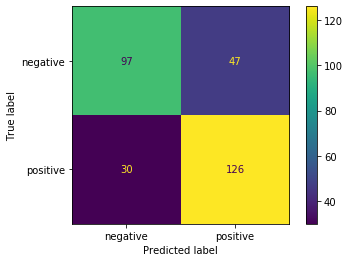

In [70]:
plot_confusion_matrix(nv_model,X_test,Y_test)

Logistic regression

In [71]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [72]:
lr_model.score(X_test,Y_test)

0.8233333333333334

In [73]:
predict_emotion(sample_text,lr_model)

positive


{'negative': 0.4845881148154637, 'positive': 0.5154118851845363}

In [95]:
#create dicison tree classifier object
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf= DecisionTreeClassifier()

In [97]:
#train decision tree classifier
clf = clf.fit(X_train,Y_train)

In [98]:
y_pred=clf.predict(X_test)

In [99]:
print("Accuracy is:",metrics.accuracy_score(Y_test,y_pred))

Accuracy is: 0.8266666666666667


In [100]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.91      0.83       144
    positive       0.90      0.75      0.82       156

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [84]:

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
df2['NSentiment']=pd.factorize(df2.Sentiment)[0]
df2['Nreview']=pd.factorize(df2.Review)[0]
df2

,Review,Sentiment,NSentiment,Nreview
0,Wow... Loved this place.,positive,0,0
1,Crust is not good.,negative,1,1
2,Not tasty and the texture was just nasty.,negative,1,2
3,Stopped by during the late May bank holiday of...,positive,0,3
4,The selection on the menu was great and so wer...,positive,0,4
...,...,...,...,...
995,I think food should have flavor and texture an...,negative,1,991
996,Appetite instantly gone.,negative,1,992
997,Overall I was not impressed and would not go b...,negative,1,993
998,"The whole experience was underwhelming, and I ...",positive,0,994


In [85]:
x2= df2['Nreview'].values.reshape(-1, 1)
y2= df2['NSentiment'].values.reshape(-1, 1)
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(x2,y2,test_size=0.3, random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
s.fit(X_train2)
X_train2=s.transform(X_train2.reshape(-1, 1))
X_test2=s.transform(X_test2.reshape(-1, 1))


In [87]:
newClassifier=KNeighborsClassifier(n_neighbors=5)
newClassifier.fit(X_train2,Y_train2)

/home/acer/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [88]:
y_predd=newClassifier.predict(X_test2)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test2,y_predd))
print(confusion_matrix(Y_test2,y_predd))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       156
           1       0.50      0.49      0.49       144

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

[[84 72]
 [73 71]]


In [111]:
X_test

<300x2035 sparse matrix of type '<class 'numpy.int64'>'
	with 2828 stored elements in Compressed Sparse Row format>

In [102]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()

In [103]:
#entrainement de model
rm.fit(X_train,Y_train)

RandomForestClassifier()

In [104]:
%timeit rm.fit(X_train,Y_train)

1.02 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [106]:
#prediction
y_pred=rm.predict_proba(X_test)

In [107]:
#TEst et evaluation
#on utilise y_test pour tester

In [108]:
rm.score(X_test,Y_test)

0.8166666666666667

In [112]:
rm.score(X_train,Y_train )

1.0

In [120]:
df2

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,991
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,992
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,993
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,994
